In [30]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
plt.style.use('fivethirtyeight')

# HW_05 - Customer wait time

In the [waiting for bus](./bus_wait.ipynb) example, we saw a difference between how long we expect the bus interval to be vs how long we _experience_ a bus interval to be. 

Now, consider creating parts on demand for customers. We'll take an example of [folding a paper airplane](https://hackmd.io/@cooperrc/HkISHYNrC/edit). We need some data to start:

1. Follow the paper airplane instructions and make one airplane
2. Edit the instructions to make it easier to follow
3. With your new process: time yourself making one airplane at-a-time and make 5 or 6 airplanes
4. With one hand, try to make a paper airplane and time the process (time process this at least 2 times)

## What is this data meant to show

We, engineers, often prescribe processes and procedures that seem to make sense, but can ignore the people that need to do the work. The process of create-try-edit-repeat should be an integral part of your writing and design process. The one-handed folding procedure could simulate many scenarios:
- someone multitasking
- someone with an injury/unuseable hand
- anything else?

When we consider a process, its important to think about the different people that are required to make the process happen. 

## Next steps

With your times recorded, you can use the average and standard deviations to find the times when parts will be ready as a function of time. Use the difference between the predicted and observed cumulative distribution functions to  predict how long your customers will have to wait on paper airplanes. 

In [32]:
N_assemblies = 1000

avg_part_time = 1.0

part_ready = np.arange(1, N_assemblies+1)*avg_part_time

Text(0.5, 0, 'time between parts (min)')

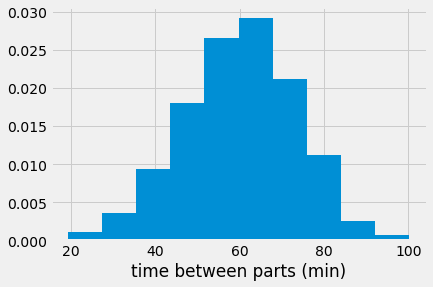

In [33]:
rng = default_rng(42)

std_part_time = 1/6

part_ready += rng.normal(loc = 0, 
                         scale = std_part_time, 
                         size = N_assemblies)

plt.hist(np.diff(part_ready)*60, density=True)
plt.xlabel('time between parts (min)')

Text(0.5, 0, 'minutes between parts')

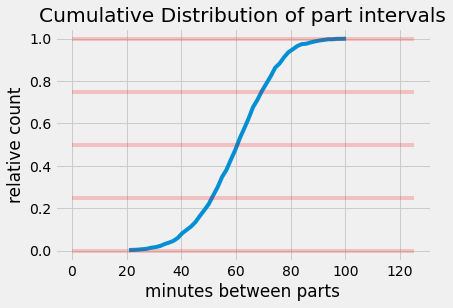

In [17]:
part_time_diff = np.diff(part_ready)*60

count, bins_count = np.histogram(part_time_diff, bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf) 
plt.plot(bins_count[1:], cdf)
plt.hlines([0, 0.25, 0.5, 0.75, 1], 
           0, 
           125, 
          alpha = 0.2, 
          colors = 'r')
plt.title('Cumulative Distribution of part intervals')
plt.ylabel('relative count')
plt.xlabel('minutes between parts')

In [18]:
num_people = 500
people_arrival = rng.random(num_people)*N_assemblies

In [21]:
person_wait = np.zeros(len(people_arrival))
obs_part_interval = np.zeros((len(part_ready), 2))
for i, part_time in enumerate(part_ready[:-1]):
    people_get_part = np.size(people_arrival[
        np.logical_and(people_arrival>=part_time,
                       people_arrival<part_ready[i+1])])
    obs_part_interval[i, 0] = part_ready[i+1] - part_time
    obs_part_interval[i, 1] = people_get_part

In [22]:
obs_part_interval = obs_part_interval[obs_part_interval[:, 0].argsort()]

Text(0.5, 0, 'minutes between parts')

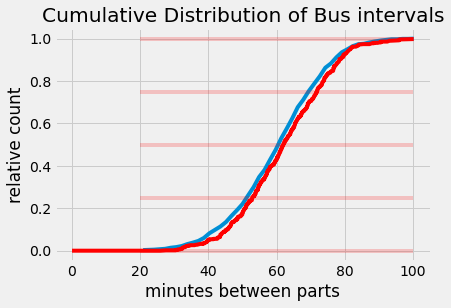

In [26]:
plt.plot(bins_count[1:], 
         cdf,
         label = 'CDF measured'
        )

cdf_obs = np.cumsum(obs_part_interval[:, 1])/num_people

plt.plot(obs_part_interval[:, 0]*60, 
         cdf_obs, 
         'r-',
        label = 'CDF observed')

plt.hlines([0, 0.25, 0.5, 0.75, 1], 
           20, 
           100, 
          alpha = 0.2, 
          colors = 'r')
plt.title('Cumulative Distribution of Bus intervals')
plt.ylabel('relative count')
plt.xlabel('minutes between parts')